In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#%matplotlib inline
%matplotlib notebook

college_data_file = "data/College.data"
auto_data_file = "data/Auto.data"

In [4]:
data = pd.read_csv(college_data_file,index_col=0)

# Exercise 8.c - various

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

<IPython.core.display.Javascript object>


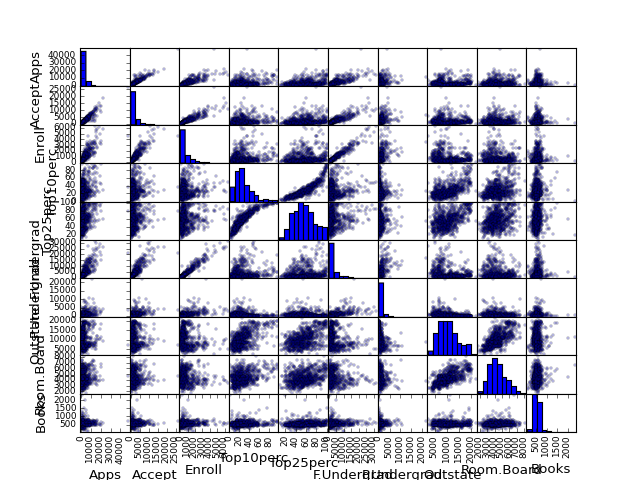

In [5]:
# Summary stats of the data
print data.describe()

# Scatter plot (pairs()) of first 10 columns
axes = pd.tools.plotting.scatter_matrix(data[data.columns[1:11]],alpha=0.2)
#plt.savefig('scatter_matrix.png')

<IPython.core.display.Javascript object>


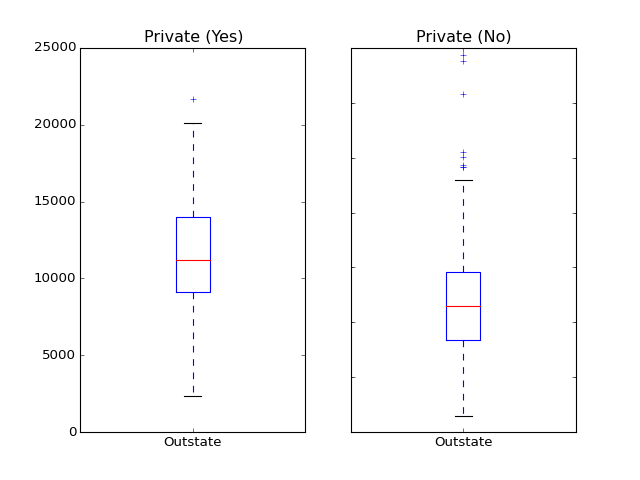

In [6]:
# Boxplot of Outstate vs Private
fig, axes = plt.subplots(nrows=1, ncols=2)

data[data['Private']=='Yes'].plot(x='Private',y='Outstate',kind='box',title='Private (Yes)',ax=axes[0],sharey=True)
data[data['Private']=='No'].plot(x='Private',y='Outstate',kind='box',title='Private (No)',ax=axes[1],sharey=True)

In [7]:
# (c.iv) Create a qualitative variable ELITE by binning Top10perc. Divide univs in 2 groups:
#  Yes/No: proportion of students coming from Top 10% of high school exceeds 50%
data['Elite'] = data['Top10perc']>50
print '%d elite universities' % len(data[data['Elite']==True])
print '%d non-elite universities' % len(data[data['Elite']==False])

78 elite universities
699 non-elite universities


<IPython.core.display.Javascript object>


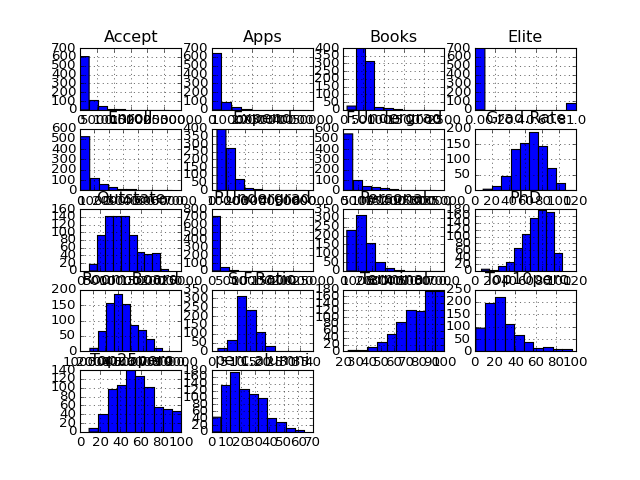

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022BB19E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000233D9BA8>]], dtype=object)

In [8]:
data.hist()

## Ex 9. Auto Dataset

In [9]:
data = pd.read_csv(auto_data_file,index_col=8)

In [10]:
print 'Describe FULL dataset'
print data.describe()
# (9.a) Origin and cylinders is a qualitative predictor, the others are quantitative
# (9.b) Range of predictors: see below
# (9.c) Mean/std dev of predictors: see below
# (9.d) remove 10th to 85th observations, find mean and std_dev
print 'Describe SHORT dataset'
print pd.concat([data.iloc[0:10],data.iloc[86:]]).describe()

Describe FULL dataset
              mpg   cylinders  displacement       weight  acceleration  \
count  397.000000  397.000000    397.000000   397.000000    397.000000   
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   
std      7.825804    1.701577    104.379583   847.904119      2.749995   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.000000  2223.000000     13.800000   
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   
75%     29.000000    8.000000    262.000000  3609.000000     17.100000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

             year      origin  
count  397.000000  397.000000  
mean    75.994962    1.574307  
std      3.690005    0.802549  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
Describe SHORT dataset


<IPython.core.display.Javascript object>


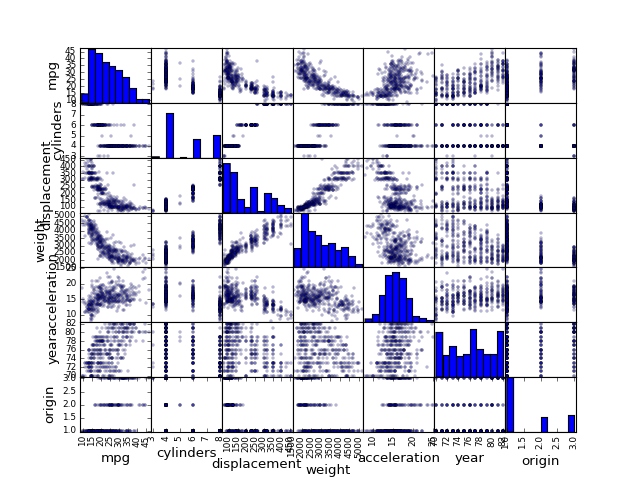

In [11]:
# (9.e) investigate predictors graphically
axes = pd.tools.plotting.scatter_matrix(data[data.columns[0:11]],alpha=0.2)

In [12]:
print data.groupby(by='cylinders').count()
data[(data['cylinders'] == 3) | (data['cylinders'] == 5)]
print '--------------------'
print data.groupby(by='origin').count()

           mpg  displacement  horsepower  weight  acceleration  year  origin
cylinders                                                                   
3            4             4           4       4             4     4       4
4          203           203         203     203           203   203     203
5            3             3           3       3             3     3       3
6           84            84          84      84            84    84      84
8          103           103         103     103           103   103     103
--------------------
        mpg  cylinders  displacement  horsepower  weight  acceleration  year
origin                                                                      
1       248        248           248         248     248           248   248
2        70         70            70          70      70            70    70
3        79         79            79          79      79            79    79


<IPython.core.display.Javascript object>


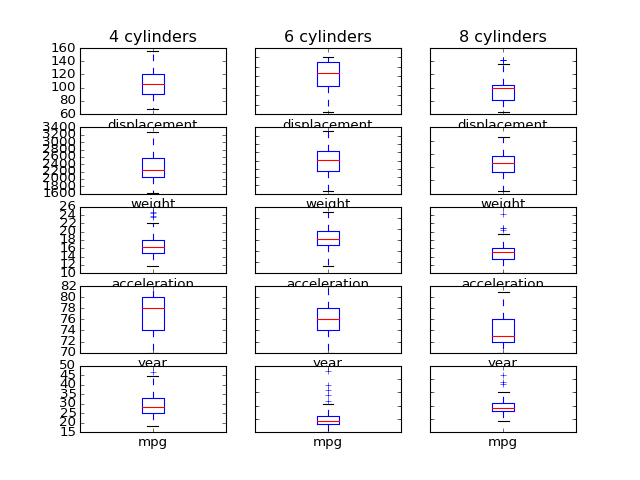

<IPython.core.display.Javascript object>


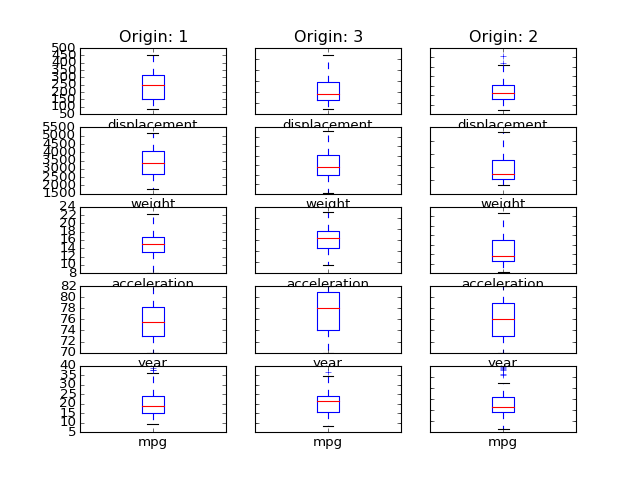

In [13]:
# interesting relations between:
# cylinders VS. displacement, weight, acceleration (linear)
# displacement VS. acceleration, weight

## no need to show cylinders in (3,5) - only 4 cars each
types = ['displacement','weight', 'acceleration','year','mpg']

cyls = [4,6,8]
fig, axes = plt.subplots(nrows=len(types), ncols=len(cyls))
for c in range(0,len(cyls)):
    for t in range(0,len(types)):
        if t == 0: axes[t,c].set_title('%d cylinders'%cyls[c])
        f=data[data['cylinders']==cyls[c]].plot(x='cylinders',y=types[t],kind='box',ax=axes[t,c],sharey=True)

# origin
org = data['origin'].unique()
fig, axes = plt.subplots(nrows=len(types), ncols=len(org))
for c in range(0,len(org)):
    for t in range(0,len(types)):
        if t == 0: axes[t,c].set_title('Origin: %d' % org[c])
        f=data[data['origin']==org[c]].plot(x='origin',y=types[t],kind='box',ax=axes[t,c],sharey=True)

 

<IPython.core.display.Javascript object>


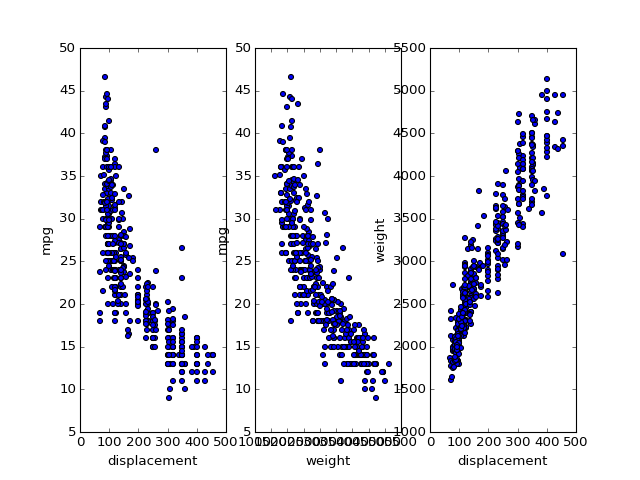

In [14]:
# (9.f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots
# suggest that any of the other variables might be useful in predicting mpg? Justify your answer.
fig, axes = plt.subplots(nrows=1, ncols=3)
data.plot(x='displacement',y='mpg',kind='scatter',ax=axes[0])
data.plot(x='weight',y='mpg',kind='scatter',ax=axes[1])
data.plot(x='displacement',y='weight',kind='scatter',ax=axes[2])

## Ex 10. Boston housing Dataset

In [25]:
descr = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town.',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per $10,000',
    'PTRATIO': 'pupil-teacher ratio by town',
    'BLACK': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s'
}
data = sm.datasets.get_rdataset("Boston", "MASS").data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### (9.a) How many rows are in this data set? How many columns? What do the rows and columns represent?
##### (9.b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.
##### (9.c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

<IPython.core.display.Javascript object>


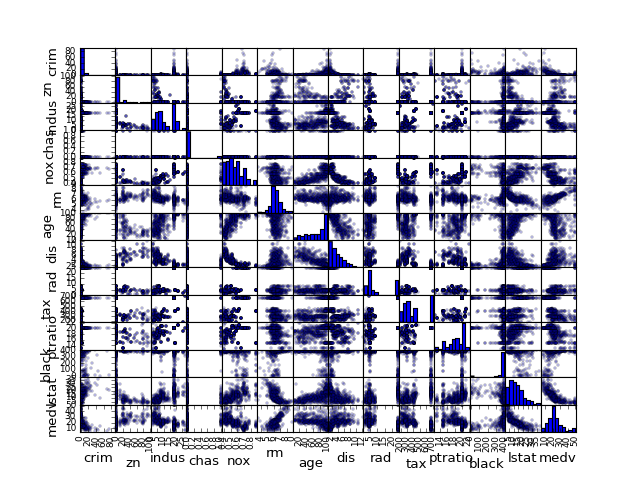

In [18]:
axes = pd.tools.plotting.scatter_matrix(data,alpha=0.2)

In [26]:
#axes = pd.tools.plotting.scatter_matrix(data,alpha=0.2)
print 'Column\tNon-null\tUnique\tDescription'
for l in data.columns:
    y = data[l]
    print '%s\t%d (%3.2f)\t%d\t%s' % (l,
                                     len(y.dropna()),
                                     float(len(y.dropna()))/len(y),
                                     len(y.dropna().unique()),
                                     descr[l.upper()]
                                    )

Column	Non-null	Unique	Description
crim	506 (1.00)	504	per capita crime rate by town
zn	506 (1.00)	26	proportion of residential land zoned for lots over 25,000 sq.ft.
indus	506 (1.00)	76	proportion of non-retail business acres per town.
chas	506 (1.00)	2	Charles River dummy variable (1 if tract bounds river; 0 otherwise)
nox	506 (1.00)	81	nitric oxides concentration (parts per 10 million)
rm	506 (1.00)	446	average number of rooms per dwelling
age	506 (1.00)	356	proportion of owner-occupied units built prior to 1940
dis	506 (1.00)	412	weighted distances to five Boston employment centres
rad	506 (1.00)	9	index of accessibility to radial highways
tax	506 (1.00)	66	full-value property-tax rate per $10,000
ptratio	506 (1.00)	46	pupil-teacher ratio by town
black	506 (1.00)	357	1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat	506 (1.00)	455	% lower status of the population
medv	506 (1.00)	229	Median value of owner-occupied homes in $1000s


<IPython.core.display.Javascript object>


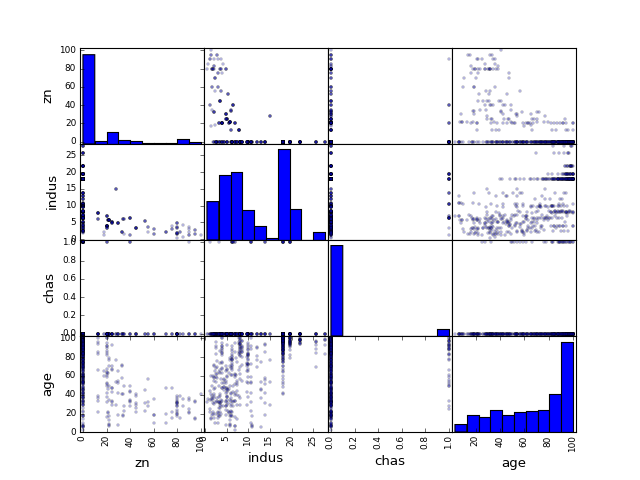

In [28]:
cols1=['crim','zn','nox','ptratio','medv']
cols2=['zn','indus','chas','age']
#axes = pd.tools.plotting.scatter_matrix(data[cols1],alpha=0.2)
axes = pd.tools.plotting.scatter_matrix(data[cols2],alpha=0.2)

# CRIM: binary variable, low and high
# High CRIME: close to job centre (low DIS), polluted (high NOX), schools overcrowded (high PTRATIO), low valued house (low MEDV), etc
# NOX, PTRATIO, CRIM: high NOX (PTRATIO) seems to be very correlated with high CRIM (low CRIM --> low NOX, low PTRATIO)
# PTRATIO, TAX: high TAX, low PTRATIO
# INDUS: inv correlated to ZN, but no need to show it further

##### (10.d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [31]:
high_crime=np.percentile(data['crim'],75)
high_tax=np.percentile(data['tax'],75)
high_pupils=np.percentile(data['ptratio'],75)
print 'Threshold: high_crime=%4.2f,high_tax=%4.2f,high_pupils=%4.2f'%(high_crime,high_tax,high_pupils)

print '%d rows with top crime' % (len(data[(data['crim']>=high_crime)]))
print '%d rows with top tax' % (len(data[(data['tax']>=high_tax)]))
print '%d rows with top pupils' % (len(data[(data['ptratio']>=high_pupils)]))

print '%d rows with top crime and tax' % (len(data[(data['crim']>=high_crime)& (data['tax']>=high_tax)]))
print '%d rows with top crime, tax, pupils' % (len(data[(data['crim']>=high_crime)& (data['tax']>=high_tax)& (data['ptratio']>=high_pupils)]))


terrible=data[(data['crim']>=high_crime)& (data['tax']>=high_tax)& (data['ptratio']>=high_pupils)].copy()

Threshold: high_crime=3.68,high_tax=666.00,high_pupils=20.20
127 rows with top crime
137 rows with top tax
196 rows with top pupils
126 rows with top crime and tax
126 rows with top crime, tax, pupils


##### (10.e) How many of the suburbs in this data set bound the Charles river?
##### (10.f) What is the median pupil-teacher ratio among the towns in this data set?
##### (10.g) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [33]:
print '10.e: ' + str(len(data[data['chas']==True]))
print '10.f: ' + str(np.median(data['ptratio']))
data[data['medv'] == np.min(data['medv'])]

10.e: 35
10.f: 19.05


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
405,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


##### (10.g) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [34]:
data[data['rm']>7].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,388.275156,5.474063,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,9.487005,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,354.310000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,384.922500,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,390.660000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,395.305000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,396.900000,16.740000,50.000000


In [35]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
